# Solução 1: Efeitos da Regularização no Treinamento

## Objetivos:

O objetivo desse desafio é avaliar as diferenças entre os modelos treinados sem regularização e os modelos treinados com regularização do tipo L1 e do tipo L2.


## Formulação (revisão):

A regularização atua como um termo adicionado na **minimização da função de erro**. 

As fórmulas estão mostradas abaixo:

### (i) Função de erro $Loss$ s/ Regularização

$${
    Loss = \frac{ \sum\limits_{i=1}^n {\biggl(y_i - \sum\limits_{j=1}^p w_j x_{i,j}  \biggr)}^2}{ 2  N }
}$$

### (ii) Função de erro $Loss$ c/ Regularização L1

$${
    Loss = \frac{ 
        \sum\limits_{i=1}^n {\biggl(y_i - \sum\limits_{j=1}^p w_j x_{i,j}  \biggr)}^2 + 
        \alpha \sum\limits_{j=1}^p \lvert w_j \rvert
     }{ 2  N }
}$$

### (iii) Função de erro $Loss$ c/ Regularização L2

$${
    Loss = \frac{ 
        \sum\limits_{i=1}^n {\biggl(y_i - \sum\limits_{j=1}^p w_j x_{i,j}  \biggr)}^2 + 
        \alpha \sum\limits_{j=1}^p w_j^2
     }{ 2  N }
}$$

___

# Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import os
import pandas as pd

In [3]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics.regression import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

C:\Users\allan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Dataset:

## Carregando os dados

In [4]:
from sklearn.datasets import load_boston
dataset = load_boston()

### Sobre o Dataset

In [5]:
print(dataset["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

### Separação das Features e Variável Dependente

In [7]:
x = pd.DataFrame(
    columns=dataset["feature_names"],
    data=dataset["data"]
)

In [8]:
y = dataset["target"]

In [9]:
x.shape

(506, 13)

In [10]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
y.shape

(506,)

In [12]:
y[:5]

array([ 24. ,  21.6,  34.7,  33.4,  36.2])

## Separação de Treino e Teste

In [13]:
# splitting 
train_index, test_index = train_test_split(
    x.index, 
    test_size=.3, 
    random_state=42
)

x_train = x.loc[train_index, :]
x_test = x.loc[test_index, :]
y_train = y[train_index]
y_test = y[test_index]

In [14]:
x_train.shape

(354, 13)

In [15]:
x_test.shape

(152, 13)

## Normalizando Features com Z-Score

Passo importante quando se treina modelos lineares, por eliminar importâncias artificialmente grandes para features contendo valores muito grandes.

In [16]:
zscore = StandardScaler().fit(x_train)
x_train = zscore.transform(x_train)
x_test = zscore.transform(x_test)

# Problemas

## A) Treinamento e Avaliação de Modelos com e sem Regularização

A regularização tem como principal objetivo reduzir a complexidade do modelo criado ao limitar o crescimento dos parâmetros durante o treinamento. Com isso, é interessante notar que modelos com regularização tendem a ter menor diferença entre os desempenhos das métricas de avaliação sobre as massas de treino e de teste, indicando uma melhor generalização do modelo.

Nessa seção, três tipos de modelo devem ser treinados: um **sem regularização**, um com **regularização L1** e um com **regularização L2**. O desempenho dos três tipos de modelo será comparado em termos de ${MSE}$ (_Mean Squared Error_) e da medida ${R^2}$.

### Modelo s/ Regularização

#### Treinamento

In [17]:
""" Complete os espaços com ? """
model = LinearRegression()
model.fit(X=x_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Avaliação

In [18]:
""" Complete os espaços com ? """
# avaliação do modelo sobre a massa de treino
mse_tr = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))
r2_tr = r2_score(y_true=y_train, y_pred=model.predict(x_train))

In [19]:
""" Complete os espaços com ? """
# avaliação do modelo sobre a massa de teste
mse_te = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))
r2_te = r2_score(y_true=y_test, y_pred=model.predict(x_test))

In [20]:
# Tabela com os resultados
pd.DataFrame(
    index=["train", "test"],
    columns=["MSE", "R^2"],
    data=[
        [mse_tr, r2_tr],
        [mse_te, r2_te]
    ]
)

,MSE,R^2
train,22.545281,0.743502
test,21.540219,0.710920


### Modelo c/ Regularização L1

#### Treinamento

In [21]:
""" Complete os espaços com ? """
model = Lasso(alpha=1, max_iter=100, random_state=42)
model.fit(X=x_train, y=y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
   positive=False, precompute=False, random_state=42, selection='cyclic',
   tol=0.0001, warm_start=False)

#### Avaliação

In [22]:
""" Complete os espaços com ? """
# avaliação do modelo sobre a massa de treino
mse_tr = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))
r2_tr = r2_score(y_true=y_train, y_pred=model.predict(x_train))

In [23]:
""" Complete os espaços com ? """
# avaliação do modelo sobre a massa de teste
mse_te = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))
r2_te = r2_score(y_true=y_test, y_pred=model.predict(x_test))

In [24]:
# Tabela com os resultados
pd.DataFrame(
    index=["train", "test"],
    columns=["MSE", "R^2"],
    data=[
        [mse_tr, r2_tr],
        [mse_te, r2_te]
    ]
)

,MSE,R^2
train,28.446004,0.676369
test,26.532481,0.643922


### Modelo c/ Regularização L2

#### Treinamento

In [25]:
""" Complete os espaços com ? """
model = Ridge(alpha=2, max_iter=100, random_state=42)
model.fit(X=x_train, y=y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
   random_state=42, solver='auto', tol=0.001)

#### Avaliação

In [26]:
""" Complete os espaços com ? """
# avaliação do modelo sobre a massa de treino
mse_tr = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))
r2_tr = r2_score(y_true=y_train, y_pred=model.predict(x_train))

In [27]:
""" Complete os espaços com ? """
# avaliação do modelo sobre a massa de teste
mse_te = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))
r2_te = r2_score(y_true=y_test, y_pred=model.predict(x_test))

In [28]:
# Tabela com os resultados
pd.DataFrame(
    index=["train", "test"],
    columns=["MSE", "R^2"],
    data=[
        [mse_tr, r2_tr],
        [mse_te, r2_te]
    ]
)

,MSE,R^2
train,22.551056,0.743436
test,21.601210,0.710102


## B) Efeito do parâmetro ${alpha}$ da regularização sobre o desempenho dos modelos

O peso ${alpha}$ dado à regularização influencia o quanto o treinamento dos parâmetros é afetado. ${alpha}$ é sempre um número não negativo (i.e. ${\geq{0}}$); o caso especial em que ${alpha=0}$ é exatamente a Regressão Linear **sem regularização**.

Nessa seção, serão plotados alguns gráficos para avaliar como o ${alpha}$ influencia nas métricas da avaliação de um modelo. A comparação das métricas de avaliação das curvas de treino e de teste será feita variando ${alpha}$ e medindo o ${MSE}$ e o ${R^2}$.

### Função de Plot

In [29]:
def plot_comparison(alpha_list, mse_tr_list, mse_te_list, r2_tr_list, r2_te_list):
    # plotting graphics
    fig, (ax_mse, ax_r2) = plt.subplots(2, sharex=True, figsize=(15, 8))

    # MSE
    mse_df = pd.DataFrame(
        index=alpha_list,
        columns=["train", "test"],
        data=list(zip(mse_tr_list, mse_te_list))
    )
    mse_df.plot(title="Comparação de MSE: Treino Vs Teste", ax=ax_mse)
    ax_mse.set(xlabel="alpha", ylabel="mean squared error")

    # R2
    r2_df = pd.DataFrame(
        index=alpha_list,
        columns=["train", "test"],
        data=list(zip(r2_tr_list, r2_te_list))
    )
    r2_df.plot(title="Comparação de R^2: Treino Vs Teste", ax=ax_r2)
    ax_r2.set(xlabel="alpha", ylabel="r squared")

### Regularização L1

In [30]:
# Definição dos valores de alpha
alpha_list = np.linspace(0.001, 12, 100)

In [31]:
# initializing lists
mse_tr_list = []
mse_te_list = []
r2_tr_list = []
r2_te_list = []

In [32]:
""" Complete os espaços com ? """
for alpha in alpha_list:
    # create / train model
    model = Lasso(alpha=alpha, max_iter=1000, random_state=42)
    model.fit(x_train, y_train)
    
    # Train Evaluation Metrics
    y_true = y_train
    y_pred = model.predict(x_train)
    mse_tr = mean_squared_error(y_true=y_true, y_pred=y_pred)
    r2_tr = r2_score(y_true=y_true, y_pred=y_pred)
    
    # Test Evaluation Metrics
    y_true = y_test
    y_pred = model.predict(x_test)
    mse_te = mean_squared_error(y_true=y_true, y_pred=y_pred)
    r2_te = r2_score(y_true=y_true, y_pred=y_pred)
    
    # append all eval metrics
    mse_tr_list.append(mse_tr)
    mse_te_list.append(mse_te)
    r2_tr_list.append(r2_tr)
    r2_te_list.append(r2_te)

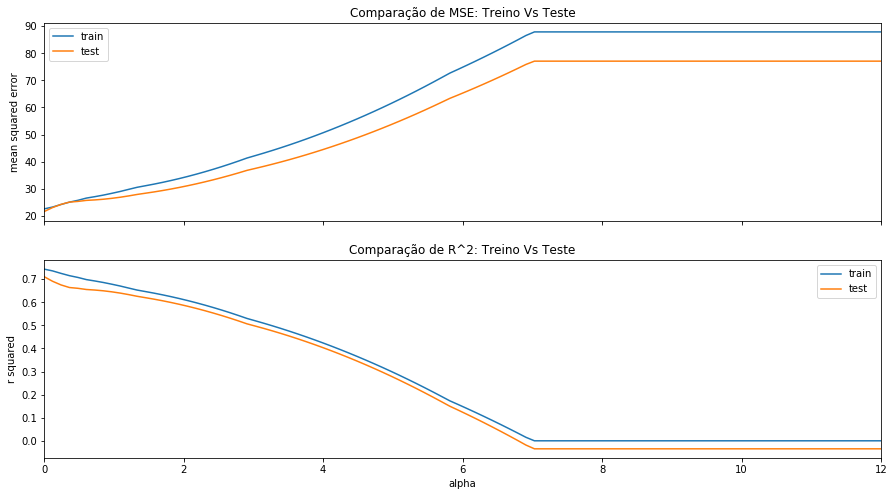

In [33]:
plot_comparison(alpha_list, mse_tr_list, mse_te_list, r2_tr_list, r2_te_list)

### Regularização L2

In [34]:
# Definição dos valores de alpha
alpha_list = np.linspace(0.001, 10000, 100)

In [35]:
# initializing lists
mse_tr_list = []
mse_te_list = []
r2_tr_list = []
r2_te_list = []

In [36]:
""" Complete os espaços com ? """
for alpha in alpha_list:
    # create / train model
    model = Ridge(alpha=alpha, max_iter=1000, random_state=42)
    model.fit(x_train, y_train)
    
    # Train Evaluation Metrics
    y_true = y_train
    y_pred = model.predict(x_train)
    mse_tr = mean_squared_error(y_true=y_true, y_pred=y_pred)
    r2_tr = r2_score(y_true=y_true, y_pred=y_pred)
    
    # Test Evaluation Metrics
    y_true = y_test
    y_pred = model.predict(x_test)
    mse_te = mean_squared_error(y_true=y_true, y_pred=y_pred)
    r2_te = r2_score(y_true=y_true, y_pred=y_pred)
    
    # append all eval metrics
    mse_tr_list.append(mse_tr)
    mse_te_list.append(mse_te)
    r2_tr_list.append(r2_tr)
    r2_te_list.append(r2_te)

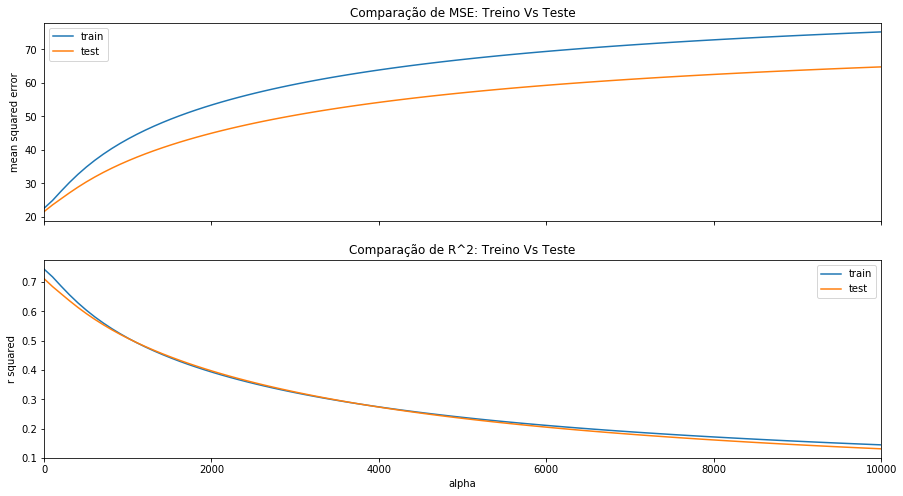

In [37]:
plot_comparison(alpha_list, mse_tr_list, mse_te_list, r2_tr_list, r2_te_list)

## C)  Avaliação dos Parâmetros

A principal característica da regularização é a diminuição gradual da magnitude dos pesos a cada iteração. Essa diminuição controla o tamanho máximo dos parâmetros internos do modelo, impedindo que os mesmos definam espaços de solução muito irregulares, o que pode levar a soluções não genéricas.

Nessa seção serão comparados os parâmetros treinados com **regularização L1**. Os valores de ${alpha}$ utilizados serão definidos a partir do estudo realizado no item B.

### Função Auxiliar

A função abaixo treina um dado modelo linear por `max_iter` épocas, armazenando o histórico de cada parâmetro.

In [38]:
def train_model(model_class, X, y, max_iter, **kwargs):
    
    def get_params(model, X, y, iter):        
        model.fit(X, y)
        return pd.DataFrame(
            index=[iter],
            columns=X.columns.tolist() + ["intercept"],
            data=[model.coef_.tolist() + [model.intercept_]]
        )
    
    model = model_class(warm_start=True, max_iter=1, **kwargs)
    params = get_params(model, X, y, 0)
    for iter in range(1, max_iter):        
        params = params.append(get_params(model, X, y, iter))
    return params

### Valor de ${alpha}$ próximo a zero

C:\Users\allan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


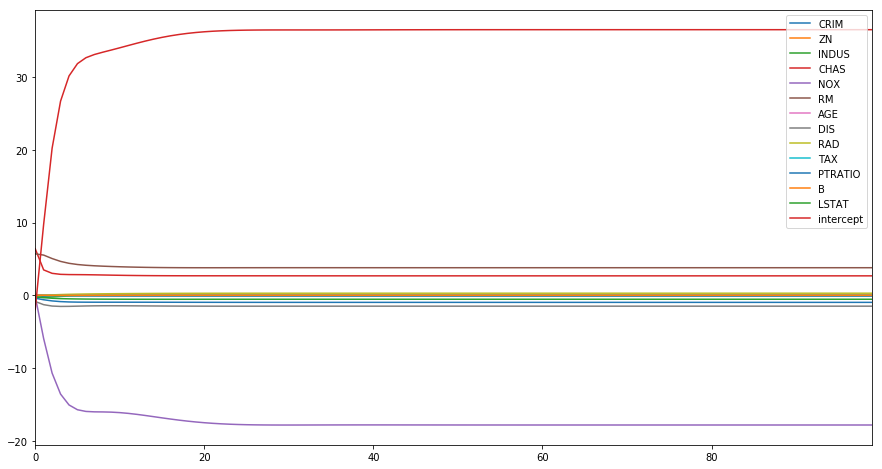

In [39]:
""" Escreva a solução aqui """
train_model(Lasso, x, y, 100, alpha=0.00001).plot(figsize=(15,8))

### Valor de ${alpha}$ mediano

C:\Users\allan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


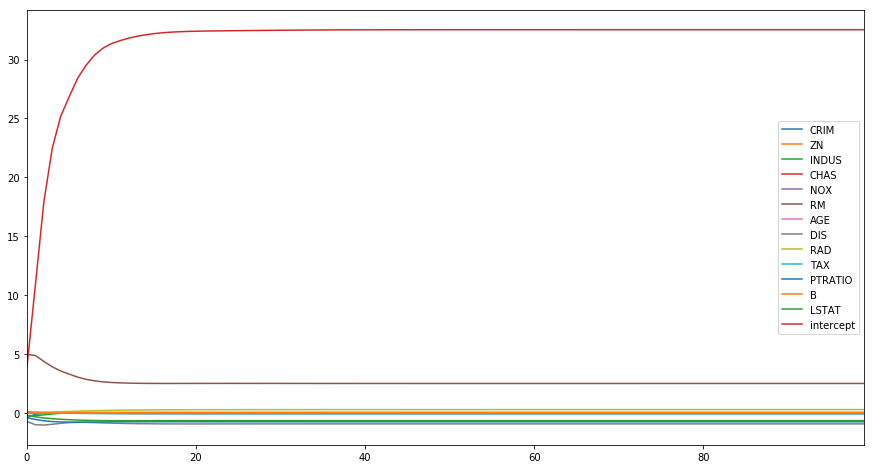

In [40]:
""" Escreva a solução aqui """
train_model(Lasso, x, y, 100, alpha=0.5).plot(figsize=(15,8))

### Valor de ${alpha}$ alto

C:\Users\allan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


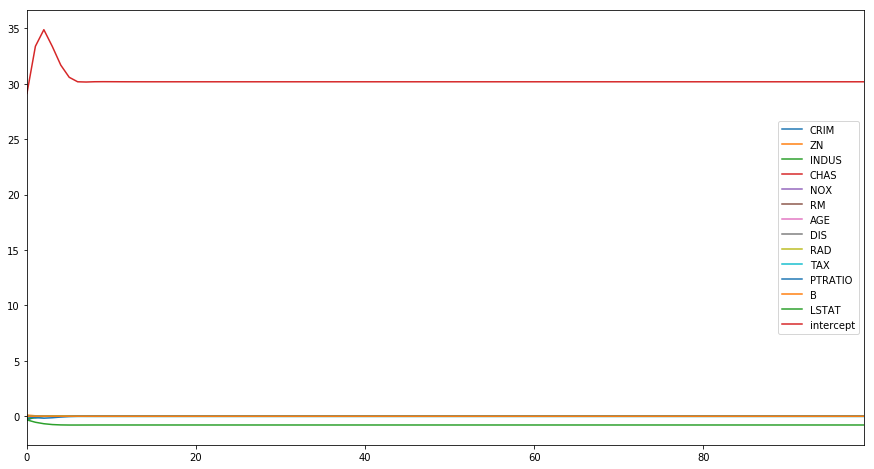

In [41]:
""" Escreva a solução aqui """
train_model(Lasso, x, y, 100, alpha=4).plot(figsize=(15,8))